## Step 1: Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

## Step 2: Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("customer_churn.csv")

# Display first 5 rows
df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


## Step 3: Understand Dataset Structure

In [3]:
# Check shape of the dataset
df.shape

(500, 9)

In [4]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [5]:
# Statistical summary for numerical columns
df.describe()

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,36.532000,113.636000,4237.882000,0.498000,0.106000
std,20.667057,51.799903,2260.619837,0.500497,0.308146
min,1.000000,20.000000,159.000000,0.000000,0.000000
25%,19.000000,67.000000,2237.250000,0.000000,0.000000
50%,37.000000,115.000000,4182.500000,0.000000,0.000000
75%,54.000000,158.000000,6266.750000,1.000000,0.000000
max,71.000000,199.000000,7992.000000,1.000000,1.000000


## Step 4: Check for Missing Values

In [6]:
# Check missing values count
df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

In [7]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100

CustomerID          0.0
Tenure              0.0
MonthlyCharges      0.0
TotalCharges        0.0
Contract            0.0
PaymentMethod       0.0
PaperlessBilling    0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

## Step 5: Handle Missing Values

In [8]:
# Fill numerical missing values with median
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

## Step 6: Remove Duplicate Records

In [10]:
# Check duplicates
df.duplicated().sum()

0

In [11]:
# Remove duplicates
df = df.drop_duplicates()

## Step 7: Fix Data Type Issues

In [12]:
# Convert TotalCharges to numeric (example)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# Recheck data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


## Step 8: Handle Outliers (Numerical Data)

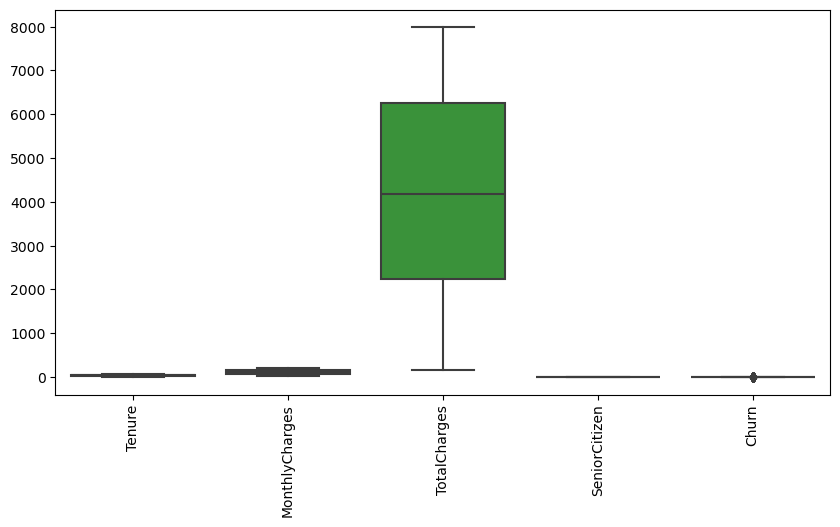

In [14]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

In [15]:
# Outlier treatment using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.clip(df[col], lower, upper)

## Step 9: Standardize Text Columns

In [16]:
# Convert text to lowercase and strip spaces
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

## Step 10: Validate Cleaned Data

In [17]:
# Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [18]:
df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,c00001,6,64,1540,one year,credit card,no,1,0
1,c00002,21,113,1753,month-to-month,electronic check,yes,1,0
2,c00003,27,31,1455,two year,credit card,no,1,0
3,c00004,53,29,7150,month-to-month,electronic check,no,1,0
4,c00005,16,185,1023,one year,electronic check,no,1,0


In [19]:
df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

## Step 11: Save Cleaned Dataset

In [20]:
# Save cleaned data
df.to_csv("cleaned_customer_churn.csv", index=False)